In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
import wandb
api = wandb.Api()

In [32]:
names, configs, weighted_losses, f1_scores = [], [], [], []

In [33]:
sweep_ids = ['ca3bym94', 'w5ybnlvf']
for i, sweep_id in enumerate(sweep_ids):
    sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
    for run in sweep.runs:
        names.append(run.name)
        configs.append('baseline')
        weighted_losses.append(run.config['weighted_loss'])
        f1_scores.append(run.summary['f1_score'])

In [34]:
sweep_ids = ['1c6j3n0a', '3bs0fyt0']
for i, sweep_id in enumerate(sweep_ids):
    sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
    for run in sweep.runs:
        names.append(run.name)
        configs.append('best6')
        weighted_losses.append(run.config['weighted_loss'])
        f1_scores.append(run.summary['f1_score'])

In [35]:
sweep_id = "m4nqsh6e"
sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
for run in sweep.runs:
    names.append(run.name)
    configs.append("baseline")
    weighted_losses.append(False)
f1_scores += list(pd.read_csv('logs/04_baseline_scratch_corrected_f1.csv')['f1_score'])[::-1]

In [36]:
sweep_id = "xq185840"
sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
for run in sweep.runs:
    names.append(run.name)
    configs.append("best6")
    weighted_losses.append(False)
    f1_scores.append(run.summary['f1_score'])

In [37]:
f1_df = pd.DataFrame(list(zip(configs[::-1], names[::-1], weighted_losses[::-1], f1_scores[::-1])), columns=['config', 'name', 'weighted_loss', 'f1_score'])
f1_df

,config,name,weighted_loss,f1_score
0,best6,kind-sweep-1,False,0.976963
1,best6,warm-sweep-2,False,0.975420
2,best6,clean-sweep-3,False,0.960962
3,best6,proud-sweep-4,False,0.974911
4,best6,worldly-sweep-5,False,0.970406
5,baseline,celestial-sweep-1,False,0.978132
6,baseline,pleasant-sweep-2,False,0.967499
7,baseline,soft-sweep-3,False,0.980712
8,baseline,celestial-sweep-4,False,0.968429
9,baseline,happy-sweep-5,False,0.970251


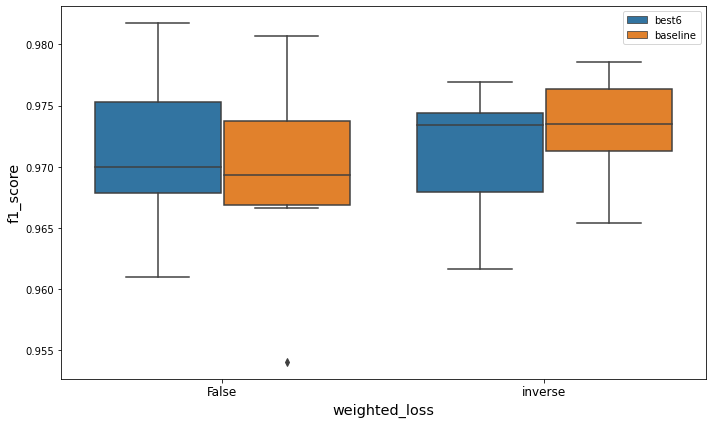

In [38]:
fig = plt.figure(figsize=(10, 6))
sns.boxplot(x='weighted_loss', y='f1_score', hue='config', data=f1_df)
#plt.ylim([0.94, 0.99])
#plt.hlines(0.980712, -0.5, 7.5, linestyles='dotted', color='grey', label='baseline maximum')
#plt.hlines(0.970251, -0.5, 7.5, linestyles='dashed', color='grey', label='baseline median')
ax = plt.gca()
l = ax.get_ylabel()
ax.set_ylabel(l, size='x-large')
ax.set_xlabel("weighted_loss", size='x-large')
plt.xticks(fontsize='large')
plt.legend()
#ax.set_xticks([])
fig.tight_layout()

#fig.savefig('../figs/glitches/06_optimized_f1scores.png', dpi=300)

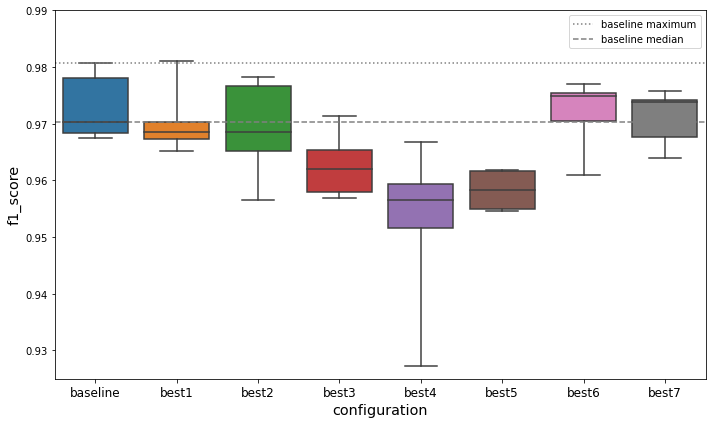

In [7]:
fig = plt.figure(figsize=(10, 6))
sns.boxplot(x='config', y='f1_score', data=f1_df, whis=100, order=sorted(f1_df['config'].unique()))
plt.ylim([0.925, 0.99])
plt.hlines(0.980712, -0.5, 7.5, linestyles='dotted', color='grey', label='baseline maximum')
plt.hlines(0.970251, -0.5, 7.5, linestyles='dashed', color='grey', label='baseline median')
ax = plt.gca()
l = ax.get_ylabel()
ax.set_ylabel(l, size='x-large')
ax.set_xlabel("configuration", size='x-large')
plt.xticks(fontsize='large')
plt.legend()
#ax.set_xticks([])
fig.tight_layout()

fig.savefig('../figs/glitches/06_optimized_f1scores.png', dpi=300)